In [6]:
#imports 
import pandas as pd
import numpy as np
import math as mt
from random import sample
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
import seaborn as sns
import scipy.stats as st
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [7]:
catalog = pd.read_csv("catalog.csv", sep=',')
test_projects = pd.read_csv("test_projects.csv", sep=',')
test_rules = pd.read_csv("test_rules.csv", sep=',')
test_transactions = pd.read_csv("test_transactions.csv", sep=',')

In [8]:
catalog.head()

,id,name,type
0,015981e401af4887becbec5f45c3cd4c,Vehiculo,project_categories
1,4500593565e942d9876fa73734336157,Solo ahorrar,project_categories
2,6f3c645d720140d0be6063b26b1c423d,Otro,project_categories
3,b252b4300a02483eb15812ff9e03b841,Comprar algo,project_categories
4,c173854d8d994c5cad7926cedb6b8770,Viajar,project_categories


In [9]:
test_projects.head()

,project_id,name,goal_date,user_id,project_category_id,total
0,7593859139ff4b00b09c6a5c2d7d4602,Hogar,2020-06-02 00:00:00.0,700b1ad8bcb948d2b948c20d8e4160cd,edd09901ae364ddb80347e40005d2244,5000.0
1,d48cd6721a8b42ccac581ea388250e47,Enero,2020-01-16 00:00:00.0,cf91c22c0f7c4cc8917af73c1f0b7fa7,4500593565e942d9876fa73734336157,3000.0
2,c50f7a157b6048459590de84a14c7c1e,Solo guardar,2020-02-14 00:00:00.0,e4eb05de0b454a17b4f9f556bb70e9c1,4500593565e942d9876fa73734336157,5000.0
3,f712136baed347e6b5c0a07a9582d4ea,Comprar algo,2022-02-22 00:00:00.0,a821b4c74ec4467e9170db0a499fa082,b252b4300a02483eb15812ff9e03b841,5000.0
4,0baba95b627a42dbbaa7a4d5a0d49458,Ahorro,2021-01-09 00:00:00.0,2de353a9a926462d86a6009cabbfa1a4,4500593565e942d9876fa73734336157,40000.0


In [10]:
test_rules.head()

,rule_id,project_id,rule_type_id,amount,frecuency,categories
0,2f206c2f263f4332aa8985dbe25fc0b5,7593859139ff4b00b09c6a5c2d7d4602,c175e7bf6cf64677903bac9389a80cd9,10.0,0,NaN
1,7cffbe8d84534f489637b0ab8694f234,7593859139ff4b00b09c6a5c2d7d4602,b30b058a53634cbcb1f589af13e6689f,228.0,7,NaN
2,f7b9d06c8e4d42a0bc17012d72cbe7be,d48cd6721a8b42ccac581ea388250e47,8f6a28107c1641d5aff4a85972f5ee06,5.0,0,2cc2e29a-30ec-445f-a420-32b6039fa488
3,21ba2243d24b4f14982e491e30088e41,c50f7a157b6048459590de84a14c7c1e,b30b058a53634cbcb1f589af13e6689f,1667.0,15,NaN
4,9525ec3f7bba4d37a919453436419bbe,c50f7a157b6048459590de84a14c7c1e,75134d7134ed41f1a906d18a0710ad8e,20.0,0,NaN


In [11]:
test_transactions.head()

,user_id,description,transaction_date,amount
0,0001c38e1231436eb1218b4caf1090d6,OXXO MARIA,2019-12-06 00:00:00.0,-335.0
1,0001c38e1231436eb1218b4caf1090d6,LIVERPOOL MEXIC,2020-01-17 00:00:00.0,-1000.0
2,0001c38e1231436eb1218b4caf1090d6,ADYENMX*SPOTIFY,2019-11-30 00:00:00.0,-99.0
3,0001c38e1231436eb1218b4caf1090d6,BP*SERV PROFESI,2019-12-01 00:00:00.0,-562.0
4,0001c38e1231436eb1218b4caf1090d6,NETFLIX,2020-01-04 00:00:00.0,-169.0


Visualizacion inicial

In [12]:
int_user_ids = [hash(uid) for uid in test_transactions["user_id"]]

In [6]:
int_user_ids[:10]

[3515080946464682431,
 3515080946464682431,
 3515080946464682431,
 3515080946464682431,
 3515080946464682431,
 3515080946464682431,
 3515080946464682431,
 3515080946464682431,
 3515080946464682431,
 3515080946464682431]

In [7]:
df = pd.DataFrame(int_user_ids,test_transactions["amount"])

In [8]:
print(df.head())

                           0
amount                      
-335.0   3515080946464682431
-1000.0  3515080946464682431
-99.0    3515080946464682431
-562.0   3515080946464682431
-169.0   3515080946464682431


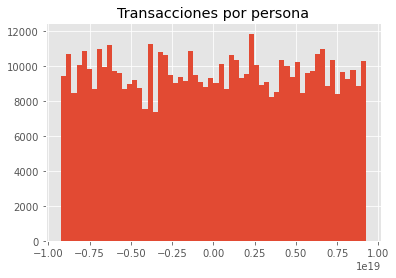

<Figure size 432x288 with 0 Axes>

In [9]:
plt.title('Transacciones por persona')
plt.hist(df, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

In [10]:
X=df.to_numpy()

In [11]:
x_scaled=scale(X)

In [12]:
print(x_scaled)

[[0.66018588]
 [0.66018588]
 [0.66018588]
 ...
 [1.59199548]
 [1.59199548]
 [1.59199548]]


In [ ]:
# Modelo
modelo_dbscan = DBSCAN(
                    eps          = 0.2,
                    min_samples  = 5,
                    metric       = 'euclidean',
                )

modelo_dbscan.fit(x_scaled)

In [ ]:
# Clasificación
labels = modelo_dbscan.labels_
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X[labels == -1, 0],
    y = X[labels == -1, 1], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');

In [ ]:
# Número de clusters y observaciones "outliers"
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Analisis de distribucion de las transacciones entre los usuarios

In [2]:
#Input de usuario
print("ingrese su nombre")

ingrese su nombre


In [3]:
nombre_user=str(input())

Mateo


In [13]:
int_user_ids.append(hash(nombre_user))

In [14]:
print("Deseas un nuevo proyecto?")

Deseas un nuevo proyecto?


In [15]:
si=str(input())

SI


In [16]:
if(si=="SI"):
    print("Selecciona tus reglas")
    print("A: 5% de mis ingresos")
    print("B: 25% de mis gastos en McCooper")
    print("C: 15% de mis ingresos cuando gane partido Deportes Temuco")

Selecciona tus reglas
A: 5% de mis ingresos
B: 25% de mis gastos en McCooper
C: 15% de mis ingresos cuando gane partido Deportes Temuco


In [17]:
A=str(input())

A


In [19]:
if(A=="A"):
    print("En cuanto estimas tus ingresos mensuales")

En cuanto estimas tus ingresos mensuales


In [20]:
ingresos=int(input())

300000


In [26]:
print("Buenisimo! esperamos que ahorres ", ingresos*0.05, " al mes ")

Buenisimo! esperamos que ahorres  15000.0  al mes 


In [27]:
gastos=275000
ahorro=ingresos-gastos

In [28]:
print(ahorro)

25000


In [30]:
if(ahorro>ingresos*0.05):
    print("Genial vas avanzando muy bien en tus ahorros")
else:
    print("Te gustaria que reajustemos tu plan de ahorro")

Genial vas avanzando muy bien en tus ahorros


In [31]:
print("Ajustamos tu plan de ahorro?")
sino=str(input("SI - NO"))

Ajustamos tu plan de ahorro?
SI - NOSI


In [32]:
if(sino=="SI"):
    print("Intentemos algo mas ambicioso! ahora tratermos de ahorrar el 7% de tus ingresos")

Intentemos algo mas ambicioso! ahora tratermos de ahorrar el 7% de tus ingresos


Recursivo